## Demonstration of Multiclass Classification

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the application of deep neural networks (DNNs) for classification using a synthetically created dataset of examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

### Generate Dataset

In the following, a synthetic dataset with $N$ examples from $C$ classes is generated by using the function [`sklearn.datasets.make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)

In [2]:
N = 2000  # total number of examples
C = 3  # number of classes

X, Y = make_classification(n_samples=N,
                           n_classes=C,
                           n_clusters_per_class=1,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           random_state=42)

The features are plotted for a subset of the $N$ examples in order to illustrate the structure of the dataset

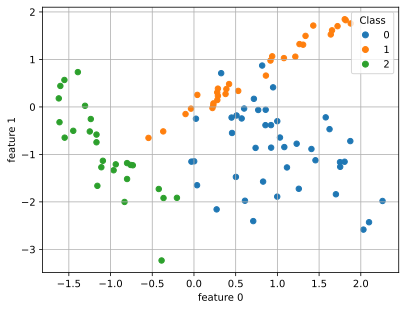

In [3]:
cmap = ListedColormap(plt.rcParams['axes.prop_cycle'].by_key()['color'][:C])
scatter = plt.scatter(X[0:100, 0], X[0:100, 1], c=Y[0:100], s=30, cmap=cmap)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid()

### One-Hot Encoding

The [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) scheme is used to encode the categorical class labels into a binary representation. For illustration, the encoding is printed for some examples.

In [4]:
Y1h = to_categorical(Y, 3)

for n in range(10):
    print(f'Categorical encoding {Y[n]}  ->  One-hot encoding {Y1h[n]}')

Categorical encoding 1  ->  One-hot encoding [0. 1. 0.]
Categorical encoding 2  ->  One-hot encoding [0. 0. 1.]
Categorical encoding 2  ->  One-hot encoding [0. 0. 1.]
Categorical encoding 1  ->  One-hot encoding [0. 1. 0.]
Categorical encoding 0  ->  One-hot encoding [1. 0. 0.]
Categorical encoding 2  ->  One-hot encoding [0. 0. 1.]
Categorical encoding 0  ->  One-hot encoding [1. 0. 0.]
Categorical encoding 1  ->  One-hot encoding [0. 1. 0.]
Categorical encoding 2  ->  One-hot encoding [0. 0. 1.]
Categorical encoding 1  ->  One-hot encoding [0. 1. 0.]


### Splitting into Training and Evaluation Subsets

The examples are split into a set of examples used for training and a set used for validation of the trained model.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1h, test_size=0.2)

### Define and Train the Model

The model is defined as a concatenation of an input layer, hidden layers and an output layer. For the model, the output shapes of the individual layers, as well as the number of parameters that have to be determined in the training phase are summarized.

In [6]:
def dnn_model(input_shape=(2,), classes=C):

    inputs = Input(shape=input_shape)
    x = Dense(16, activation='relu')(inputs)
    x = Dense(16, activation='relu')(x)
    x = Dense(classes, activation='softmax')(x)

    return Model(inputs, x)


model = dnn_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


Now the model is compiled and trained. We used the `categorical crossentropy` as loss and the `Adam` optimizer. As evaluation metrics, the accuracy of the prediction is used. The loss and the accuracy is plotted for each epoch for both the training and validation subsets.

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_data=(
    X_test, Y_test), epochs=100, batch_size=32)

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.9234 - accuracy: 0.5419 - val_loss: 0.8194 - val_accuracy: 0.7975
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.7366 - accuracy: 0.8019 - val_loss: 0.6721 - val_accuracy: 0.8275
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.8381 - val_loss: 0.5214 - val_accuracy: 0.8625
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.8600 - val_loss: 0.4109 - val_accuracy: 0.8725
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8725 - val_loss: 0.3506 - val_accuracy: 0.8825
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8788 - val_loss: 0.3154 - val_accuracy: 0.8925
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8875 - val_loss: 0.2926 - val_accuracy: 0.9075
Epoch 8/100
5

Epoch 59/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9456 - val_loss: 0.2033 - val_accuracy: 0.9475
Epoch 60/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.9463 - val_loss: 0.2023 - val_accuracy: 0.9500
Epoch 61/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9456 - val_loss: 0.2045 - val_accuracy: 0.9450
Epoch 62/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9469 - val_loss: 0.2054 - val_accuracy: 0.9475
Epoch 63/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9469 - val_loss: 0.2027 - val_accuracy: 0.9500
Epoch 64/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9469 - val_loss: 0.2085 - val_accuracy: 0.9425
Epoch 65/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1707 - accuracy: 0.9469 - val_loss: 0.2033 - val_accuracy: 0.9475
Epoch 

### Evaluation of the Model

The evaluation of the model is illustrated using some of the most common evaluation metrics for a classification model. First we take a look at the evolution of the loss and the accuracy over the epochs

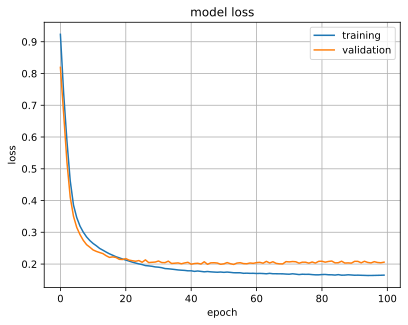

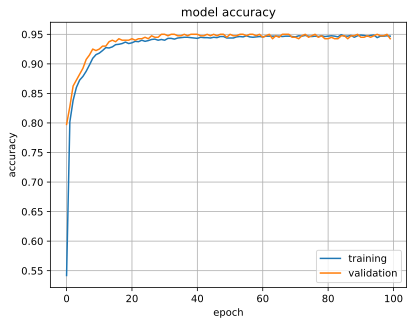

In [8]:
def plot_history(history, key):
    plt.figure()
    plt.plot(history.history[key], label='training')
    plt.plot(history.history[f'val_{key}'], label='validation')
    plt.title(f'model {key}')
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.legend()
    plt.grid()


plot_history(history, 'loss')
plot_history(history, 'accuracy')

The decision boundaries of the trained model are visualized in the following

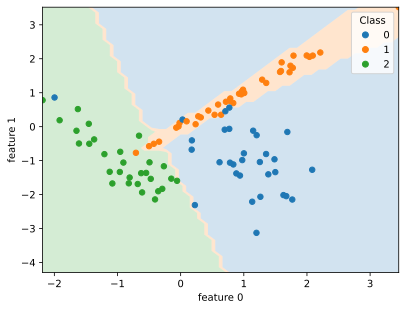

In [9]:
def plot_decision_boundaries(X, Y, model):

    x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
    y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]))
    xx, yy = np.meshgrid(x, y)
    Xgrid = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(Xgrid)
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=cmap, alpha=.2, levels=3)
    scatter = plt.scatter(X[0:100, 0], X[0:100, 1],
                          c=Y[0:100], s=30, cmap=cmap)
    plt.legend(*scatter.legend_elements(), title="Class")

    plt.xlabel('feature 0')
    plt.ylabel('feature 1')


plot_decision_boundaries(X_test, np.argmax(Y_test, axis=1), model)

The [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) visualizes the performance of the trained model in terms of correctly predicting the labels of the examples in the evaluation dataset. Wrong classifications show up in the off-diagonal elements.

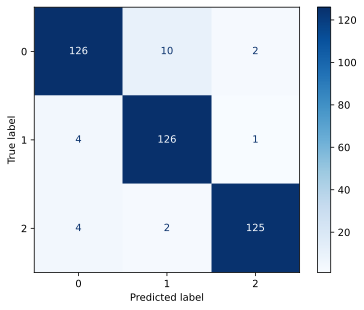

In [10]:
Y_pred = model.predict(X_test)

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(C))
disp.plot(cmap=plt.cm.Blues)

The performance of the trained classifier on the validation examples may also be summarized in a classification report including various performance metrics used for classification

In [11]:
print(classification_report(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       138
           1       0.91      0.96      0.94       131
           2       0.98      0.95      0.97       131

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.